- This dataset is a collection of CustomerID,Genre,Age,Annual Income(k$),Spending Score (1-100)


In [189]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [190]:
# Loading the dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Preprocessing
### Checking for missing values

In [191]:
df.isnull().sum().sum()

np.int64(0)

### Inspecting data types

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Dropping unnecessary columns

In [193]:
# Drop 'CustomerID' column as it is not needed for clustering
df = df.drop('CustomerID', axis=1)
df.head(2)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


In [194]:
# Renaming the Gender column values for better readability
df = df.rename(columns={'Genre': 'Gender'})
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


In [195]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# EDA (Exploratory Data Analysis)

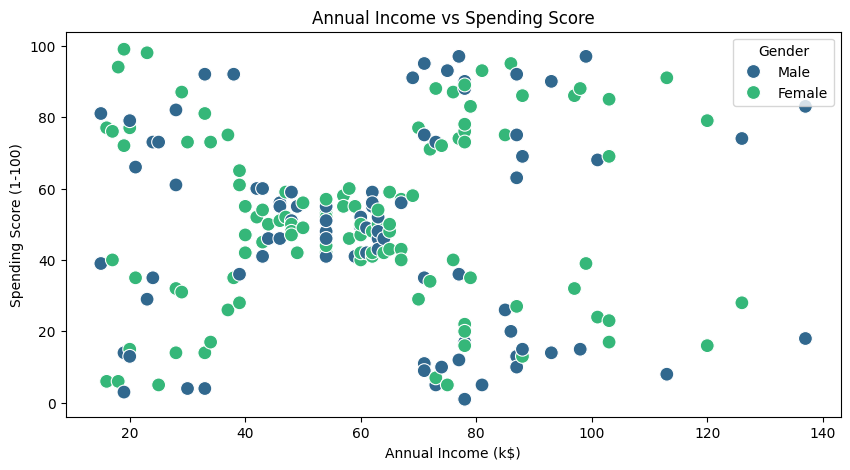

In [196]:
# Relationship between annual income and spending score
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', palette='viridis', s=100, hue='Gender')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

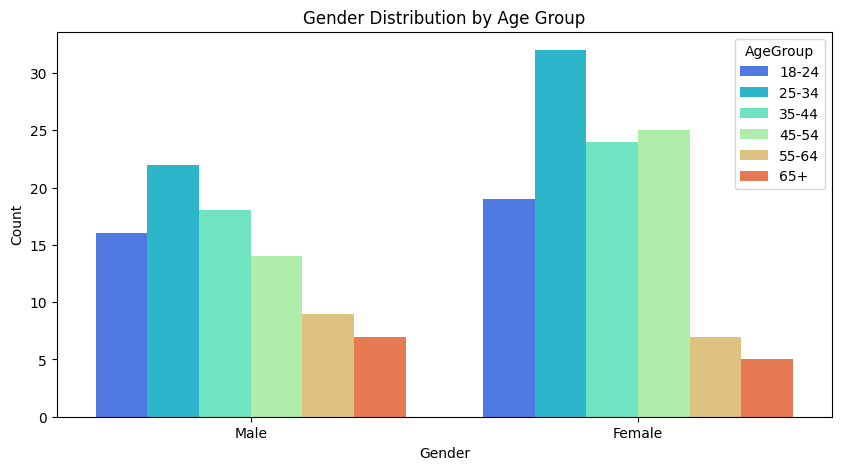

In [197]:
# Create Age Groups
age_bins = [18, 25, 35, 45, 55, 65, 70]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Plot
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Gender', hue='AgeGroup', palette='rainbow')
plt.title('Gender Distribution by Age Group')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


In [198]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeGroup
0,Male,19,15,39,18-24
1,Male,21,15,81,18-24
2,Female,20,16,6,18-24
3,Female,23,16,77,18-24
4,Female,31,17,40,25-34


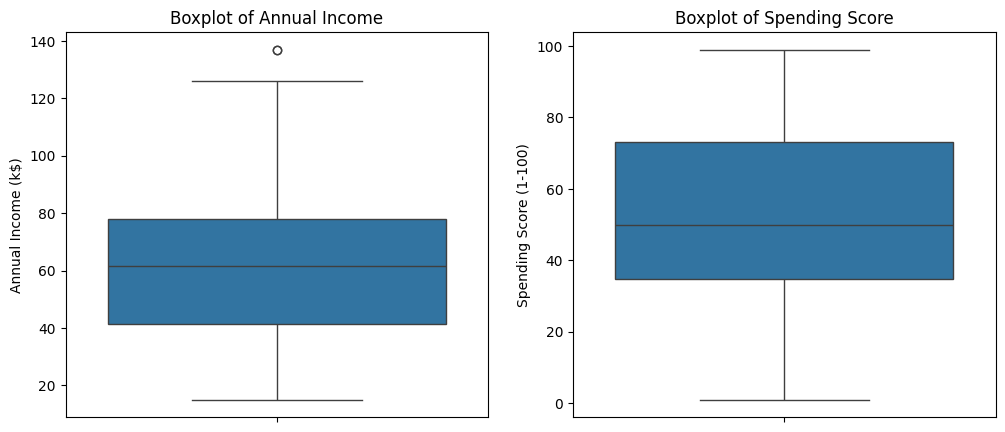

In [199]:
# Detection of outliers
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Annual Income (k$)'])
plt.title('Boxplot of Annual Income')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Spending Score (1-100)'])
plt.title('Boxplot of Spending Score')
plt.show()

### Finding the optimal number of clusters using the Elbow Method
The **Elbow Method** is a technique used to determine the optimal number of clusters (k) in clustering algorithms like K-Means. It involves plotting the explained variance (or inertia) against the number of clusters and looking for a point where the rate of decrease sharply changes, resembling an "elbow." This point indicates the optimal k value, balancing cluster compactness and simplicity.

In [200]:
data = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values
#  Finding the optimal number of clusters using the Elbow Method  
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

### Plotting the Elbow Method graph

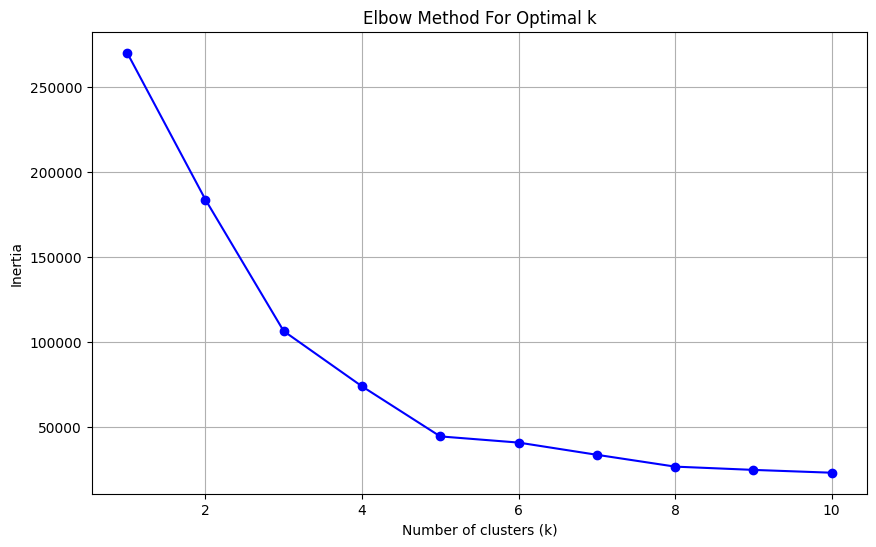

In [201]:
# Plotting the elbow graph
plt.figure(figsize=(10,6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


### Applying KMeans Clustering

**KMeans clustering** is a popular `unsupervised` machine learning algorithm used to *partition a dataset into K distinct clusters based on feature similarity*. \
The algorithm works by initializing K centroids, assigning each data point to the nearest centroid, and then updating the centroids based on the mean of the assigned points. \
This process is repeated iteratively until convergence, resulting in clusters where data points within the same cluster are more similar to each other than to those in other clusters. 
KMeans is widely `used` for customer segmentation, image compression, and pattern recognition tasks.

In [207]:
# Applying KMeans Clustering
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data)
df['Cluster'] = kmeans.labels_
print(kmeans.cluster_centers_)


[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


### Plotting the Clusters

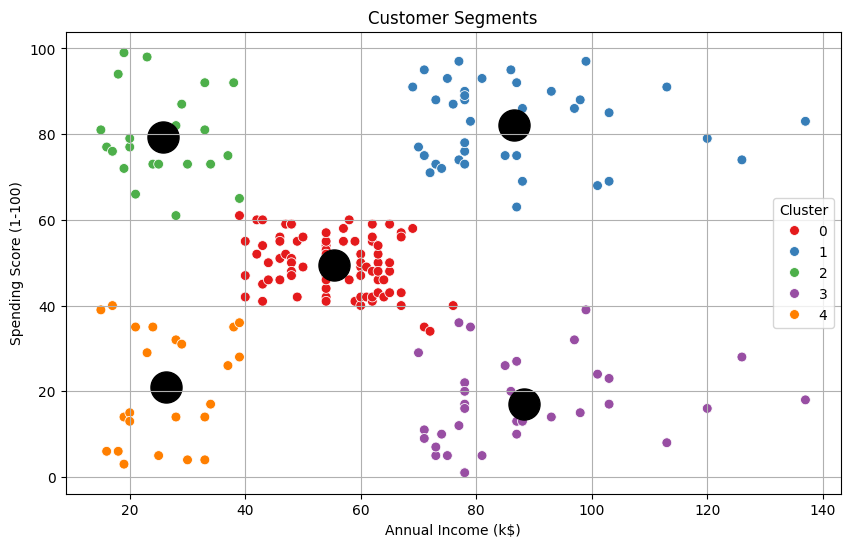

In [210]:
# plotting the clusters and visualizing centeriods
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500, c='black', marker='o', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')    
plt.title('Customer Segments')
plt.grid(True)
plt.show()

### Evaluating Cluster Centers


The **Silhouette Score** is a metric used to evaluate the quality of clustering results. It measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a value close to 1 indicates that the object is well clustered, a value of 0 suggests that the object is on or very close to the decision boundary between two neighboring clusters, and a negative value indicates that the object may have been assigned to the wrong cluster. The Silhouette Score helps in assessing the effectiveness of clustering algorithms and determining the optimal number of clusters.

In [209]:
# Silhouette Score
score = silhouette_score(data, kmeans.labels_)
print(f'Silhouette Score for k={optimal_k}: {score}')

Silhouette Score for k=5: 0.553931997444648


# Cluster Interpretation
- After analyzing the cluster centers, we can interpret the clusters as follows:
- **Cluster 0**: High income, high spending score - likely loyal customers.
- **Cluster 1**: Low income, low spending score - budget-conscious customers.
- **Cluster 2**: Medium income, medium spending score - average customers.
- **Cluster 3**: High income, low spending score - potential savers or cautious spenders.
- **Cluster 4**: Low income, high spending score - impulsive or young customers.

In [211]:
import joblib

# Save model
joblib.dump(kmeans, "kmeans_model.pkl")

['kmeans_model.pkl']